**Redesigning An Engagement Algorithm to Make It Note Hateful**

In [3]:
# Example Content
example_content = [
    {
        'title': 'Example 1',
        'nuanced_language': True,
        'perspective_balance': 0.8,
        'perspective_range': 0.9,
        'conflict_potential': 0.1,
        'inflammatory_language': 0.1,
        'polarization_index': 0.2,
        'user_rating': 0.9
    },
    {
        'title': 'Example 2',
        'nuanced_language': False,
        'perspective_balance': 0.2,
        'perspective_range': 0.3,
        'conflict_potential': 0.8,
        'inflammatory_language': 0.7,
        'polarization_index': 0.9,
        'user_rating': 0.2
    },
    {
        'title': 'Example 3',
        'nuanced_language': True,
        'perspective_balance': 0.7,
        'perspective_range': 0.8,
        'conflict_potential': 0.2,
        'inflammatory_language': 0.2,
        'polarization_index': 0.3,
        'user_rating': 0.8
    }
]

*First we weigh the metrics to determine how important it is*

In [4]:
metrics = {
    'constructive_dialogue': 0.25, 
    'diversity_exposure': 0.1,        
    'community_health': 0.25,
    'user_reported_quality': 0.4
}

*These next few blocks are functions that measure the scores for each of the metrics I have above*

In [8]:
def measure_constructive_dialogue(content):
    dialogue_indicators = [
        content.get('nuanced_language', False),
        content.get('perspective_balance', 0) > 0.5,
        content.get('conflict_potential', 0) < 0.3
    ]
    return sum(dialogue_indicators) / len(dialogue_indicators)

In [9]:
def measure_diversity_exposure(content):
    return content.get('perspective_range', 0)

In [12]:
def measure_community_health(content):
    negative_impact_factors = [
        content.get('inflammatory_language', 0),
        content.get('polarization_index', 0)
    ]
    return 1 - max(negative_impact_factors)

In [11]:
def measure_user_reported_quality(content):
    return content.get('user_rating', 0.5)

*Now we calculate the overall score for a post!*

In [13]:
def calculate_content_score(content, metrics):
    scores = {
        'constructive_interactions': measure_constructive_dialogue(content),
        'diversity_exposure': measure_diversity_exposure(content),
        'community_health': measure_community_health(content),
        'user_reported_quality': measure_user_reported_quality(content)
    }
    
    total_score = sum(
        scores[metric] * weight 
        for metric, weight in metrics.items()
    )
    
    return max(0, min(1, total_score))

*This is where the 'ethical algorithm' comes into play by ranking all the content*

In [14]:
scored_content = [
    (content, calculate_content_score(content, metrics)) 
    for content in example_content
]

recommended_content = [
    content for content, score in 
    sorted(scored_content, key=lambda x: x[1], reverse=True)
]

print("\n# Recommended Content Ranking:")
for content in recommended_content:
    score = calculate_content_score(content, metrics)
    print(f"- {content['title']} (Ethical Engagement Score: {score:.2f})")


# Recommended Content Ranking:
- Example 1 (Ethical Engagement Score: 0.90)
- Example 3 (Ethical Engagement Score: 0.83)
- Example 2 (Ethical Engagement Score: 0.14)


*And here's a fun little visualization inspired by my data science course*

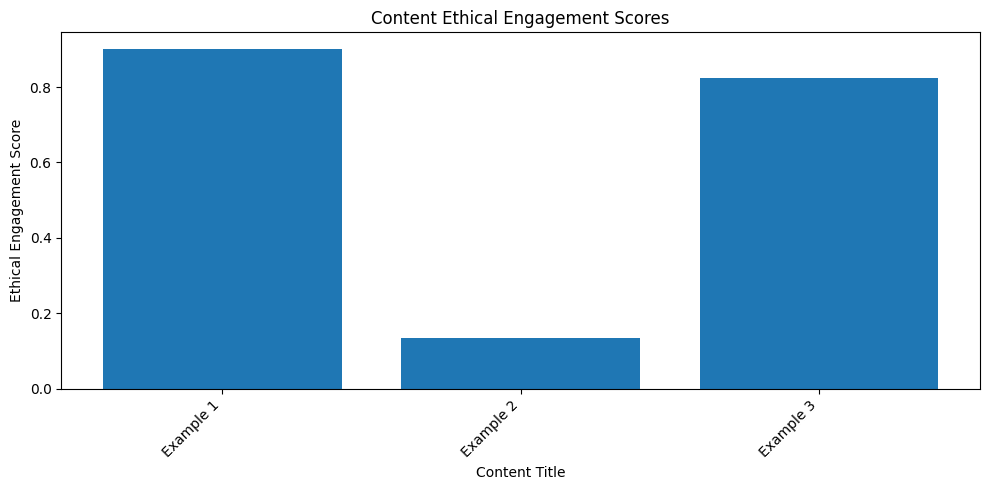

In [16]:
import matplotlib.pyplot as plt

def visualize_content_scores(content_pool, metrics):
    titles = [content['title'] for content in content_pool]
    scores = [calculate_content_score(content, metrics) for content in content_pool]
    
    plt.figure(figsize=(10, 5))
    plt.bar(titles, scores)
    plt.title('Content Ethical Engagement Scores')
    plt.xlabel('Content Title')
    plt.ylabel('Ethical Engagement Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

visualize_content_scores(example_content, metrics)